In [1]:
%pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/26/d0/22f68eb23eea053a31655960f133c0be9726c6a881547e6e9e7e2a946c4f/opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 667.8 kB/s eta 0:00:58
   ---------------------------------------- 0.2/38.8 MB 2.8 MB/s eta 0:00:14
   ---------------------------------------- 0.3/38.8 MB 2.2 MB/s eta 0:00:18
   ---------------------------------------- 0.4/38.8 MB 1.9 MB/s eta 0:00:21
   ---------------------------------------- 0.4/38.8 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.5/38.8 MB 1.7 MB/s eta 0:00:23
    --------------------------------------- 0.5/38.8 MB 1.6 MB/s eta 0:00:25
    --------------------------------------- 0.6/38.8 MB 1.6 MB/s eta 0:


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Image Processing 

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [4]:

image_path = 'data/ipl_img.png'
img = cv2.imread(image_path)

In [4]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
kernel = np.array([[-2, -2, -2],
                   [-2, 16, -2],
                   [-2, -2, -2]])

In [6]:
convolved_img = cv2.filter2D(gray_img, -1, kernel)

In [7]:

plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

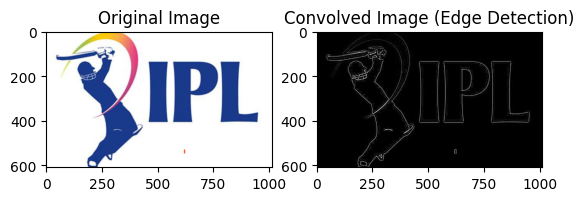

In [8]:
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(convolved_img, cmap='gray')
plt.title('Convolved Image (Edge Detection)')

plt.show()

## Semantic Analysis for IPL_Comments

In [9]:
!pip install opencv-python-headless


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
comments_df = pd.read_csv('data/ipl_comments.csv')

In [12]:
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

comments_df['cleaned_comment'] = comments_df['comment'].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\peeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peeyu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
tfidf = TfidfVectorizer(max_features=500)
X = tfidf.fit_transform(comments_df['cleaned_comment']).toarray()

In [14]:
y = comments_df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_prob = model.predict_proba(X)
y_pred = model.predict(X)

In [17]:
for i in range(len(comments_df)):
    comment = comments_df['comment'][i]
    predicted_sentiment = y_pred[i]
    prob_negative = y_prob[i][0]
    prob_positive = y_prob[i][1]
    
    print(f"Sentence: {comment}")
    print(f"Predicted Sentiment: {predicted_sentiment} (Probabilities: Negative: {prob_negative:.4f}, Positive: {prob_positive:.4f})")
    print("-" * 50)

Sentence: The match was so thrilling, loved every moment!
Predicted Sentiment: 1 (Probabilities: Negative: 0.4011, Positive: 0.5989)
--------------------------------------------------
Sentence: Not a fan of how the game turned out, pretty boring.
Predicted Sentiment: 0 (Probabilities: Negative: 0.5000, Positive: 0.5000)
--------------------------------------------------
Sentence: What an amazing comeback by the team, truly legendary!
Predicted Sentiment: 1 (Probabilities: Negative: 0.4011, Positive: 0.5989)
--------------------------------------------------
Sentence: Poor performance, expected much better.
Predicted Sentiment: 0 (Probabilities: Negative: 0.5866, Positive: 0.4134)
--------------------------------------------------
Sentence: Best IPL season ever, can't wait for next year!
Predicted Sentiment: 1 (Probabilities: Negative: 0.4011, Positive: 0.5989)
--------------------------------------------------
Sentence: Too many mistakes in the field, very disappointing.
Predicted Sent